In [8]:
import pandas as pd
from glob import glob
import json
import numpy as np 
import matplotlib.pyplot as plt
# import seaborn as sns

# 1. Read user responses

In [40]:
user_response_dir = "../new_user_responses/"
user_responses = glob(user_response_dir+"*")
user_responses.sort()

# 2. Create fig

In [10]:
responses_dict = {i:[0,0] for i in range(10)}
for user_response in user_responses:
    responses = pd.read_csv(user_response)
    for i, r in responses.iterrows():
        k = int(r["img_path"].split("_n-")[1].split(".p")[0])
        responses_dict[k][r["response"]] += 1

In [11]:
responses_dict

{0: [10, 140],
 1: [29, 121],
 2: [66, 84],
 3: [98, 52],
 4: [98, 52],
 5: [110, 40],
 6: [115, 35],
 7: [119, 31],
 8: [123, 27],
 9: [135, 15]}

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


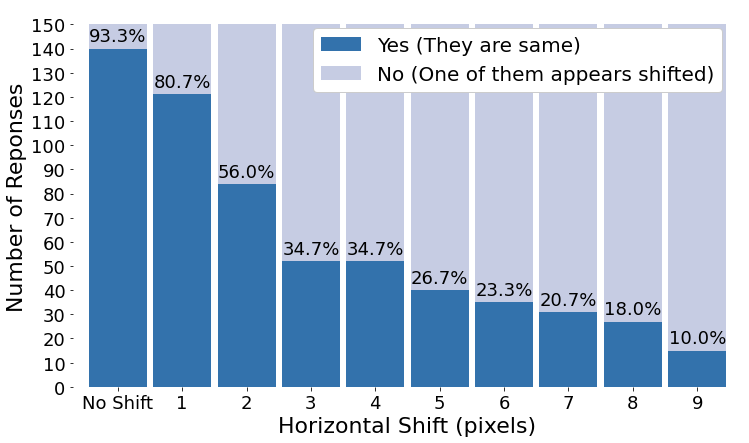

In [12]:
data = {}
for k in responses_dict.keys():
    data[k] = responses_dict[k][::-1]

# data

data_df = pd.DataFrame.from_dict(data).T

data_df = pd.concat([pd.DataFrame([str(i) for i in range(10)]), data_df], axis=1)

data_df.columns = ["shift", "Yes (They are same)", "No (One of them appears shifted)"]

from matplotlib import rcParams
rcParams['font.family'] = "Times New Roman"

data_df.plot( 
    x = 'shift',  
    kind = 'bar',  
    stacked = True,  
    mark_right = True,
    figsize=(12, 7), 
    alpha=0.8,
    color=["#004f98","#b8c0dd"], width=0.9)

plt.box(False)
plt.yticks([10*i for i in range(16)],fontsize=18)
plt.xticks([v for v in range(10)], ["No Shift"]+[v for v in range(1,10)],rotation=0, fontsize=18)

plt.xlabel("Horizontal Shift (pixels)", fontsize=22, )
plt.ylabel("Number of Reponses", fontsize=22)

plt.legend(loc='upper right', bbox_to_anchor=(0.985, 0.97), frameon=True, fontsize=20, framealpha=1)
  
df_total = data_df["Yes (They are same)"] + data_df["No (One of them appears shifted)"]
df_rel = data_df[data_df.columns[1:]].div(df_total, 0)*100


for k, n in enumerate(df_rel): 
    for i, (cs, ab, pc) in enumerate(zip(data_df.iloc[:, 1:].cumsum(1)[n],  
                                         data_df[n], df_rel[n])):
        if k==0:
            plt.text(i, cs+5, str(np.round(pc, 1))+"%",  va = 'center', ha = 'center', color="black",fontsize=18)
# plt.savefig("responses.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
plt.show()

# 3. Calculate variability in responses

### Std. in user responses per sample

In [16]:
sample_response = {}
for user_response in user_responses:
    responses = pd.read_csv(user_response)
    for i, r in responses.iterrows():
        k = r["img_path"]
        if k in sample_response.keys():
            sample_response[k].append(r["response"])
        else:
            sample_response[k] = [r["response"]]

In [17]:
# sample_response

In [18]:
samples_by_pix_shift = {}
for i in range(10):
    samples_by_pix_shift[i] = [r for r in sample_response if int(r.split("_n-")[1].split(".pn")[0])==i]    

In [19]:
# samples_by_pix_shift

In [20]:
responses_by_pix_shift = {}
for i in range(10):
    responses_by_pix_shift[i] = [np.std(sample_response[r]) for r in samples_by_pix_shift[i]]

In [21]:
print("Mean and Std. in user responses")
for i in range(10):
    print( str(i)+"_pix_shift: "+str(np.round(np.mean(responses_by_pix_shift[i]),2))+", "+str( np.round(np.std(responses_by_pix_shift[i]),2)))

Mean and Std. in user responses
0_pix_shift: 0.09, 0.17
1_pix_shift: 0.19, 0.23
2_pix_shift: 0.34, 0.21
3_pix_shift: 0.24, 0.23
4_pix_shift: 0.3, 0.24
5_pix_shift: 0.23, 0.24
6_pix_shift: 0.21, 0.24
7_pix_shift: 0.12, 0.2
8_pix_shift: 0.18, 0.23
9_pix_shift: 0.13, 0.21


# 4. Create response file for JND test

In [41]:
sample_response = {}
for user_response in user_responses:
    responses = pd.read_csv(user_response)
    for i, r in responses.iterrows():
        k = r["img_path"]
        if k in sample_response.keys():
            sample_response[k].append(r["response"])
        else:
            sample_response[k] = [r["response"]]

In [42]:
responsesAtleast3 = {}
for k in sample_response.keys():
    if len(sample_response[k]) > 2:
        responsesAtleast3[k] = sample_response[k]

In [43]:
countSamplesPerPixShift = {k:0 for k in range(10)}
for k in responsesAtleast3.keys():
    n = int(k.split("_n-")[1].split(".png")[0])
    countSamplesPerPixShift[n] += 1

In [44]:
countSamplesPerPixShift

{0: 32, 1: 30, 2: 33, 3: 29, 4: 29, 5: 28, 6: 32, 7: 30, 8: 30, 9: 28}

In [45]:
# responsesAtleast3

## Total number of samples for JND test

In [46]:
np.sum(list(countSamplesPerPixShift.values()))

301

## Variability in samples for JND test

In [47]:
print("Mean and Std. of the number of samples per pix shift: "+
      str(np.round(np.mean(list(countSamplesPerPixShift.values())),1))+","+
      str(np.round(np.std(list(countSamplesPerPixShift.values())),1)))

Mean and Std. of the number of samples per pix shift: 30.1,1.6


## Save dict

In [48]:
# responsesAtleast3

In [49]:
json_data = json.dumps(responsesAtleast3)
f = open('user_jnd.json', 'w')
f.write(json_data)

14009